# 🏦 Análisis Exploratorio de Datos: Churn Bancario

**El Caso de Negocio:**
Somos consultores de datos para un banco europeo que está perdiendo clientes. 
Nuestro objetivo es entender qué factores influyen en la decisión de los clientes 
de abandonar el banco (churn).

**¿Por qué es importante?**
- Retener un cliente cuesta 5x menos que adquirir uno nuevo
- El churn promedio en banca es 10-15% anual
- Cada cliente perdido representa ingresos futuros perdidos

**Objetivos de la clase:**
- Comprender el perfil de clientes que abandonan el banco
- Identificar factores de riesgo de churn
- Generar hipótesis para estrategias de retención
- Preparar datos para modelos predictivos

**Agenda:**
1. Introducción al caso y carga de datos
2. Exploración inicial y calidad de datos
3. Análisis univariado de variables clave
4. Análisis bivariado: relaciones con churn
5. Detección de patrones y outliers
6. Síntesis de hallazgos y recomendaciones

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style='whitegrid')



## 🏦 Contexto del Negocio

### ¿Qué es el Churn en Banca?
**Churn** = Cuando un cliente cierra su cuenta y deja de usar los servicios del banco.

### ¿Por qué ocurre?
- Insatisfacción con el servicio
- Mejores ofertas de la competencia  
- Cambios en la situación financiera personal
- Problemas con productos o tarifas
- Experiencia digital deficiente

### Nuestro Dataset
Datos de **10,000 clientes** de un banco europeo con presencia en:
- 🇫🇷 Francia
- 🇪🇸 España  
- 🇩🇪 Alemania

In [3]:
# Cargar el dataset de churn bancario
df = pd.read_csv('churn.csv')
print("🏦 DATASET DE CHURN BANCARIO CARGADO")
print("=" * 50)
print(f"📊 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")

🏦 DATASET DE CHURN BANCARIO CARGADO
📊 Dimensiones: 10,000 filas x 14 columnas


In [5]:
# Primeras 5 filas para entender la estructura
print("\n🔍 PRIMERAS 5 FILAS:")
display(df.head())


🔍 PRIMERAS 5 FILAS:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 📋 Diccionario de Variables

### 🔍 Variables Identificadoras
- **RowNumber**: Número de fila (no útil para análisis)
- **CustomerId**: ID único del cliente
- **Surname**: Apellido del cliente

### 👤 Variables Demográficas
- **Age**: Edad del cliente
- **Gender**: Género (Male/Female)
- **Geography**: País (France/Spain/Germany)

### 💰 Variables Financieras
- **CreditScore**: Puntaje crediticio (300-850)
- **Balance**: Saldo en cuenta
- **EstimatedSalary**: Salario estimado anual

### 🏦 Variables de Relación Bancaria
- **Tenure**: Años como cliente del banco
- **NumOfProducts**: Número de productos contratados
- **HasCrCard**: Tiene tarjeta de crédito (1/0)
- **IsActiveMember**: Es miembro activo (1/0)

### 🎯 Variable Target
- **Exited**: Cliente abandonó el banco (1=Sí, 0=No)

In [4]:
# Exploración inicial de la estructura
print("🔍 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)

# Información básica
print("\n📊 TIPOS DE DATOS:")
print(df.dtypes)

print("\n📈 INFORMACIÓN DETALLADA:")
df.info()


🔍 INFORMACIÓN GENERAL DEL DATASET

📊 TIPOS DE DATOS:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

📈 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Te

## 🧹 Calidad de los Datos

### Primer checkpoint: ¿Qué tan 'limpios' están nuestros datos?

In [6]:
# Análisis de calidad de datos
print("🧹 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)

# Valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("❓ VALORES FALTANTES:")
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).round(2)

print(missing_df[missing_df['Valores Faltantes'] > 0])
if missing_data.sum() == 0:
    print("✅ ¡Excelente! No hay valores faltantes")

# Duplicados
duplicates = df.duplicated().sum()
print(f"\n🔄 REGISTROS DUPLICADOS: {duplicates}")
if duplicates == 0:
    print("✅ No hay duplicados")

# Verificar consistencia de datos
print("\n🔍 VERIFICACIÓN DE CONSISTENCIA:")
print(f"CreditScore rango: {df['CreditScore'].min()} - {df['CreditScore'].max()}")
print(f"Age rango: {df['Age'].min()} - {df['Age'].max()}")
print(f"Tenure rango: {df['Tenure'].min()} - {df['Tenure'].max()}")
print(f"NumOfProducts rango: {df['NumOfProducts'].min()} - {df['NumOfProducts'].max()}")

🧹 ANÁLISIS DE CALIDAD DE DATOS
❓ VALORES FALTANTES:
Empty DataFrame
Columns: [Variable, Valores Faltantes, Porcentaje]
Index: []
✅ ¡Excelente! No hay valores faltantes

🔄 REGISTROS DUPLICADOS: 0
✅ No hay duplicados

🔍 VERIFICACIÓN DE CONSISTENCIA:
CreditScore rango: 350 - 850
Age rango: 18 - 92
Tenure rango: 0 - 10
NumOfProducts rango: 1 - 4


In [ ]:
# Análisis de la variable target
print("🎯 ANÁLISIS DE LA VARIABLE TARGET: CHURN")
print("=" * 50)

# Distribución del churn
churn_counts = df['Exited'].value_counts()
churn_rate = df['Exited'].mean()

print(f"Clientes que NO abandonaron (0): {churn_counts[0]:,} ({(1-churn_rate)*100:.1f}%)")
print(f"Clientes que SÍ abandonaron (1): {churn_counts[1]:,} ({churn_rate*100:.1f}%)") #1 decimal dsp de la coma
print(f"\n📊 TASA DE CHURN: {churn_rate*100:.1f}%")

🎯 ANÁLISIS DE LA VARIABLE TARGET: CHURN
Clientes que NO abandonaron (0): 7,963 (79.6%)
Clientes que SÍ abandonaron (1): 2,037 (20.4%)

📊 TASA DE CHURN: 20.4%


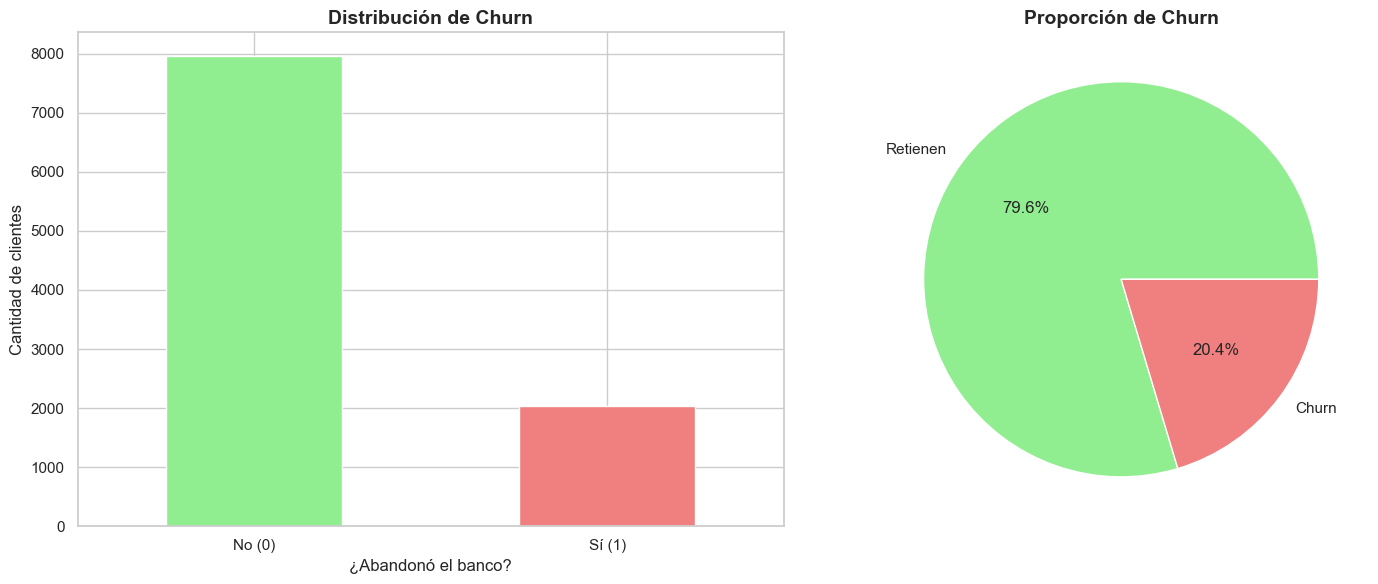


💡 INSIGHT: La tasa de churn del 20.4% está fuera del promedio de la industria bancaria (10-15%)


In [11]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
churn_counts.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'])
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('¿Abandonó el banco?')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].set_xticklabels(['No (0)', 'Sí (1)'], rotation=0)

# Gráfico de torta
churn_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                 colors=['lightgreen', 'lightcoral'], labels=['Retienen', 'Churn'])
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHT: La tasa de churn del {churn_rate*100:.1f}% está {'dentro del promedio' if 10 <= churn_rate*100 <= 15 else 'fuera del promedio'} de la industria bancaria (10-15%)")


## 📊 Estadísticas Descriptivas

### Conociendo el perfil de nuestros clientes

In [ ]:
# Estadísticas descriptivas completas
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
display(df.describe())

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
display(df.describe(include='object'))

📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## 📈 Análisis Univariado

### Variables Numéricas: Entendiendo las distribuciones

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2136524684.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


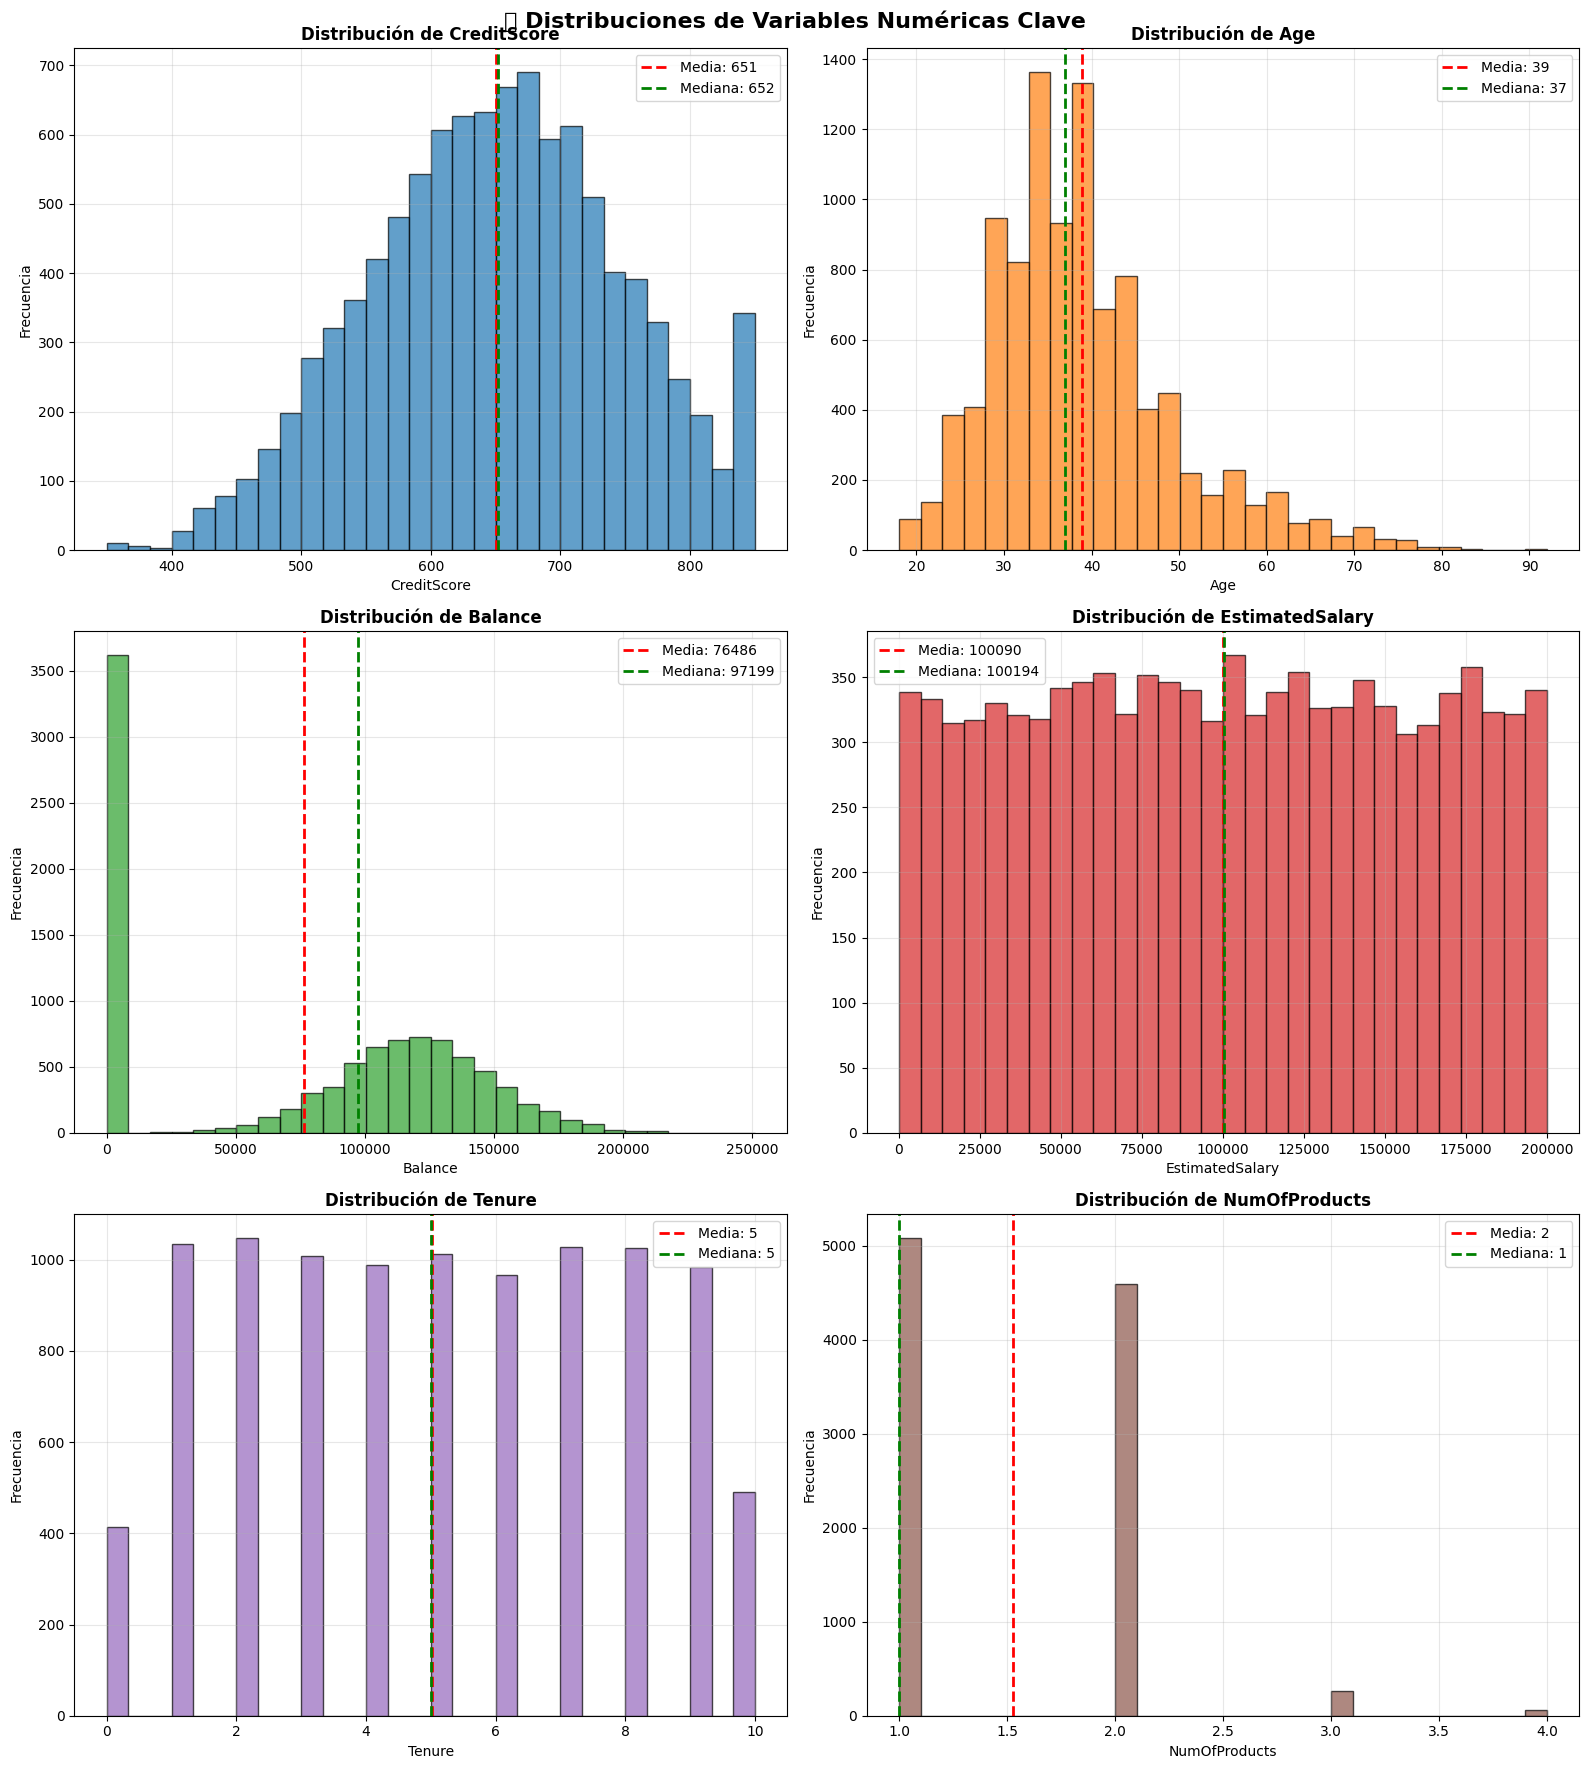

🔍 ANÁLISIS DETALLADO POR VARIABLE

🏦 CREDITSCORE:
------------------------------
Media: 650.53
Mediana: 652.00
Desviación Estándar: 96.65
Coeficiente de Variación: 14.9%
Asimetría: -0.07
Interpretación: Aproximadamente simétrica

🏦 AGE:
------------------------------
Media: 38.92
Mediana: 37.00
Desviación Estándar: 10.49
Coeficiente de Variación: 26.9%
Asimetría: 1.01
Interpretación: Asimétrica hacia la derecha (cola larga a la derecha)

🏦 TENURE:
------------------------------
Media: 5.01
Mediana: 5.00
Desviación Estándar: 2.89
Coeficiente de Variación: 57.7%
Asimetría: 0.01
Interpretación: Aproximadamente simétrica

🏦 BALANCE:
------------------------------
Media: 76,485.89
Mediana: 97,198.54
Desviación Estándar: 62,397.41
Coeficiente de Variación: 81.6%
Asimetría: -0.14
Interpretación: Aproximadamente simétrica

🏦 NUMOFPRODUCTS:
------------------------------
Media: 1.53
Mediana: 1.00
Desviación Estándar: 0.58
Coeficiente de Variación: 38.0%
Asimetría: 0.75
Interpretación: Asimétric

In [7]:

# Histogramas para variables numéricas clave
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('📊 Distribuciones de Variables Numéricas Clave', fontsize=16, fontweight='bold')

variables_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

for i, var in enumerate(variables_plot):
    row = i // 2
    col = i % 2
    
    # Histograma
    axes[row, col].hist(df[var], bins=30, alpha=0.7, color=sns.color_palette()[i], edgecolor='black')
    axes[row, col].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Media: {df[var].mean():.0f}')
    axes[row, col].axvline(df[var].median(), color='green', linestyle='--', linewidth=2,
                          label=f'Mediana: {df[var].median():.0f}')
    
    axes[row, col].set_title(f'Distribución de {var}', fontweight='bold')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis detallado por variable numérica
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

print("🔍 ANÁLISIS DETALLADO POR VARIABLE")
print("=" * 50)

for var in variables_numericas:
    print(f"\n🏦 {var.upper()}:")
    print("-" * 30)
    
    mean_val = df[var].mean()
    median_val = df[var].median()
    std_val = df[var].std()
    skew_val = df[var].skew()
    
    print(f"Media: {mean_val:,.2f}")
    print(f"Mediana: {median_val:,.2f}")
    print(f"Desviación Estándar: {std_val:,.2f}")
    print(f"Coeficiente de Variación: {(std_val/mean_val)*100:.1f}%")
    print(f"Asimetría: {skew_val:.2f}")
    
    # Interpretación de asimetría
    if abs(skew_val) < 0.5:
        skew_interp = "Aproximadamente simétrica"
    elif skew_val > 0.5:
        skew_interp = "Asimétrica hacia la derecha (cola larga a la derecha)"
    else:
        skew_interp = "Asimétrica hacia la izquierda (cola larga a la izquierda)"
    
    print(f"Interpretación: {skew_interp}")

In [ ]:
##zero inflated poisson model

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2445952265.py:15: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


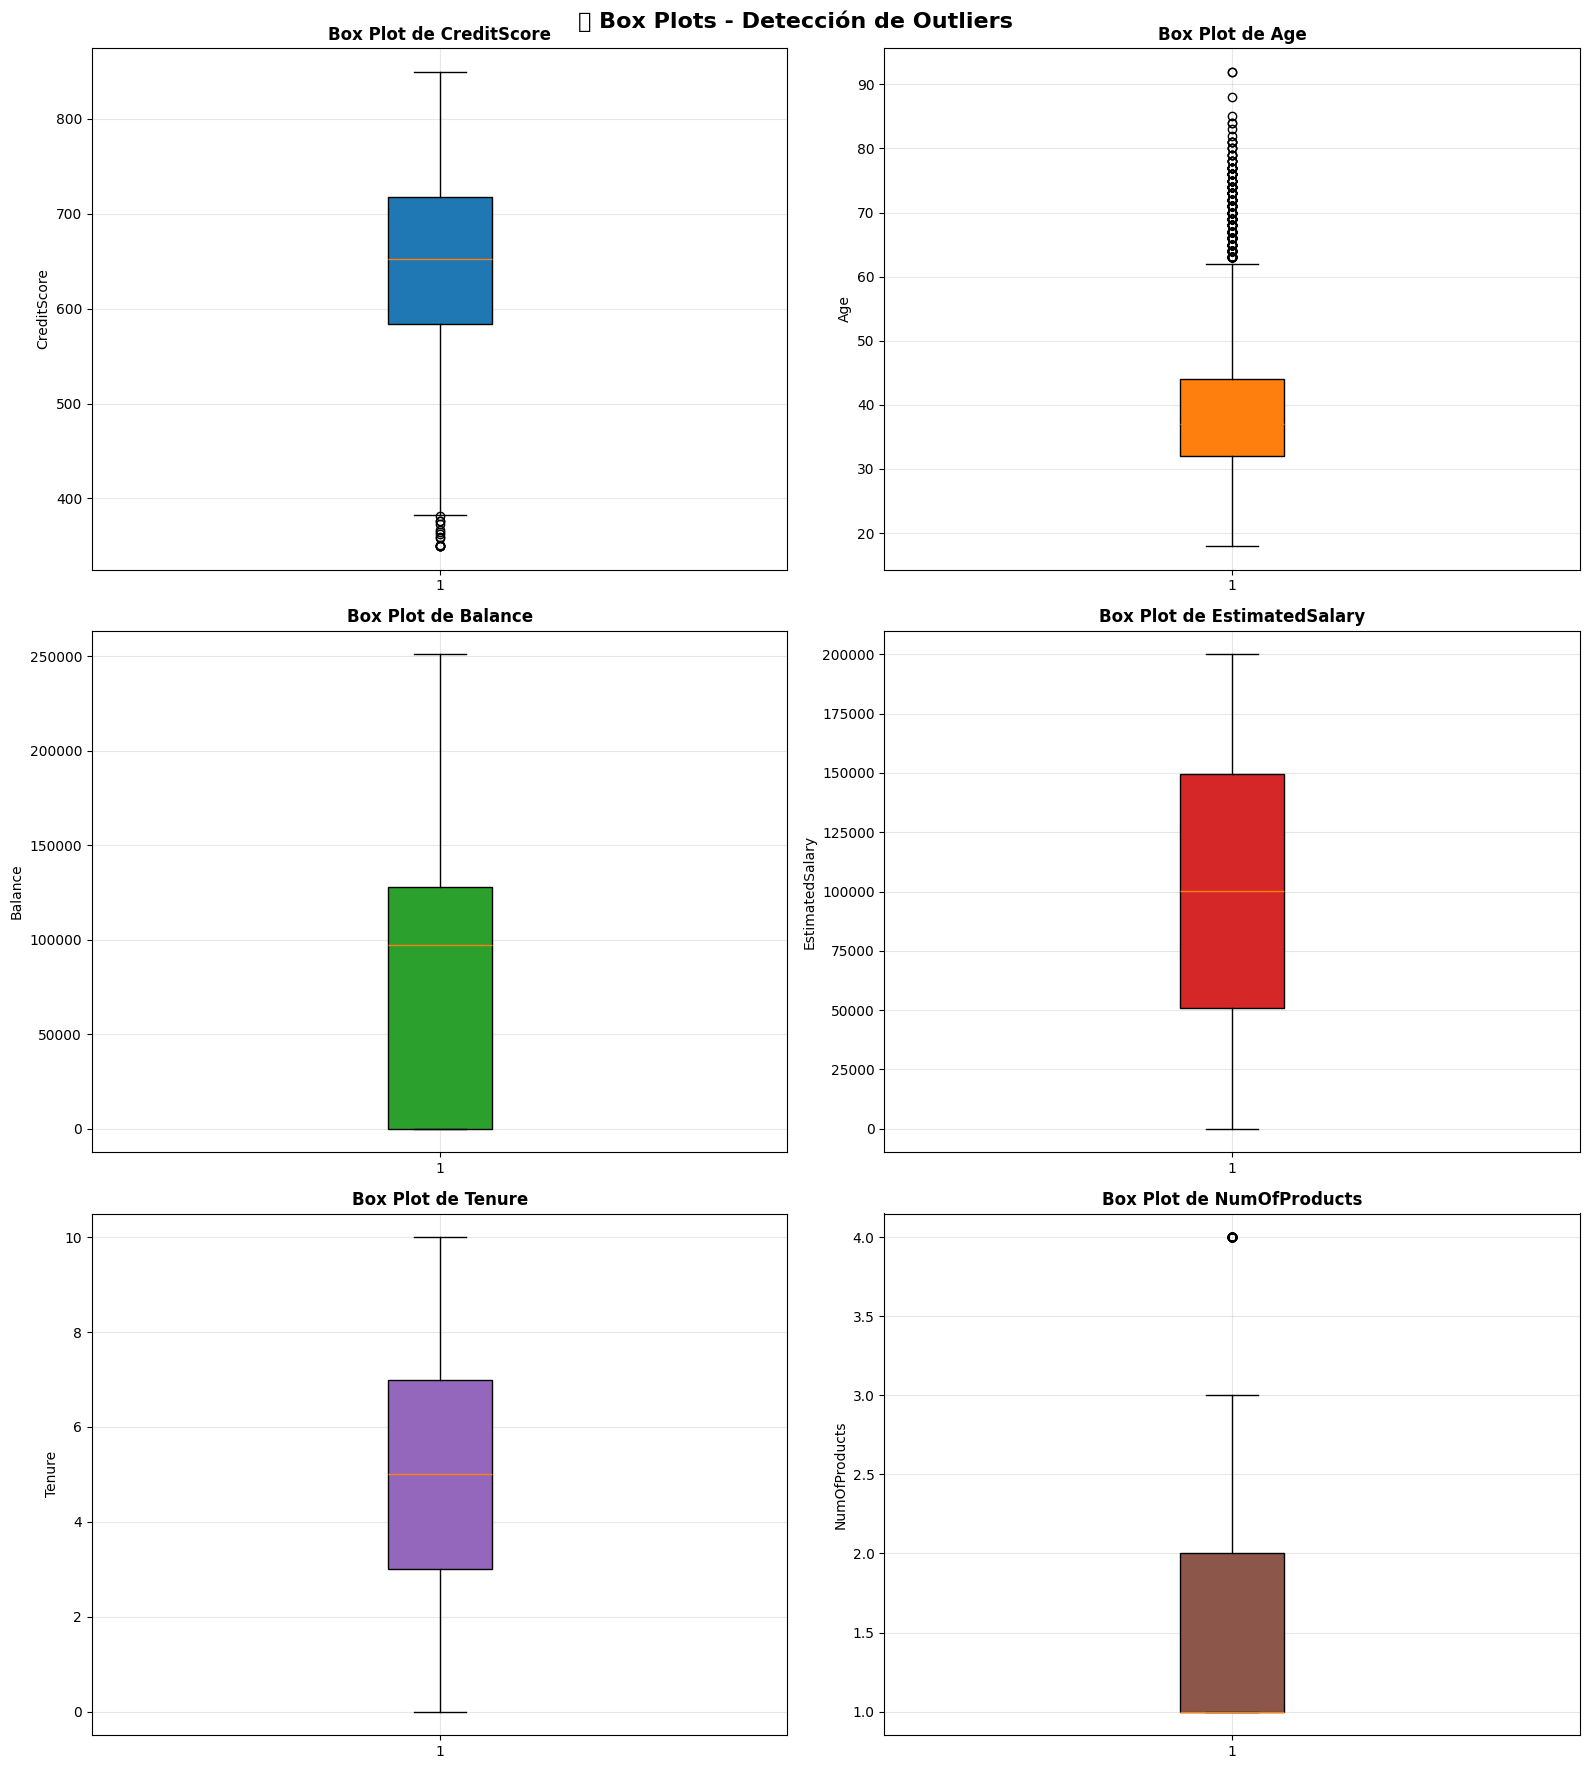

In [8]:
# Box plots para identificar outliers
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('📦 Box Plots - Detección de Outliers', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_plot):
    row = i // 2
    col = i % 2
    
    box_plot = axes[row, col].boxplot(df[var], patch_artist=True, 
                                     boxprops=dict(facecolor=sns.color_palette()[i]))
    axes[row, col].set_title(f'Box Plot de {var}', fontweight='bold')
    axes[row, col].set_ylabel(var)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Variables Categóricas: Conociendo la demografía

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2915693283.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


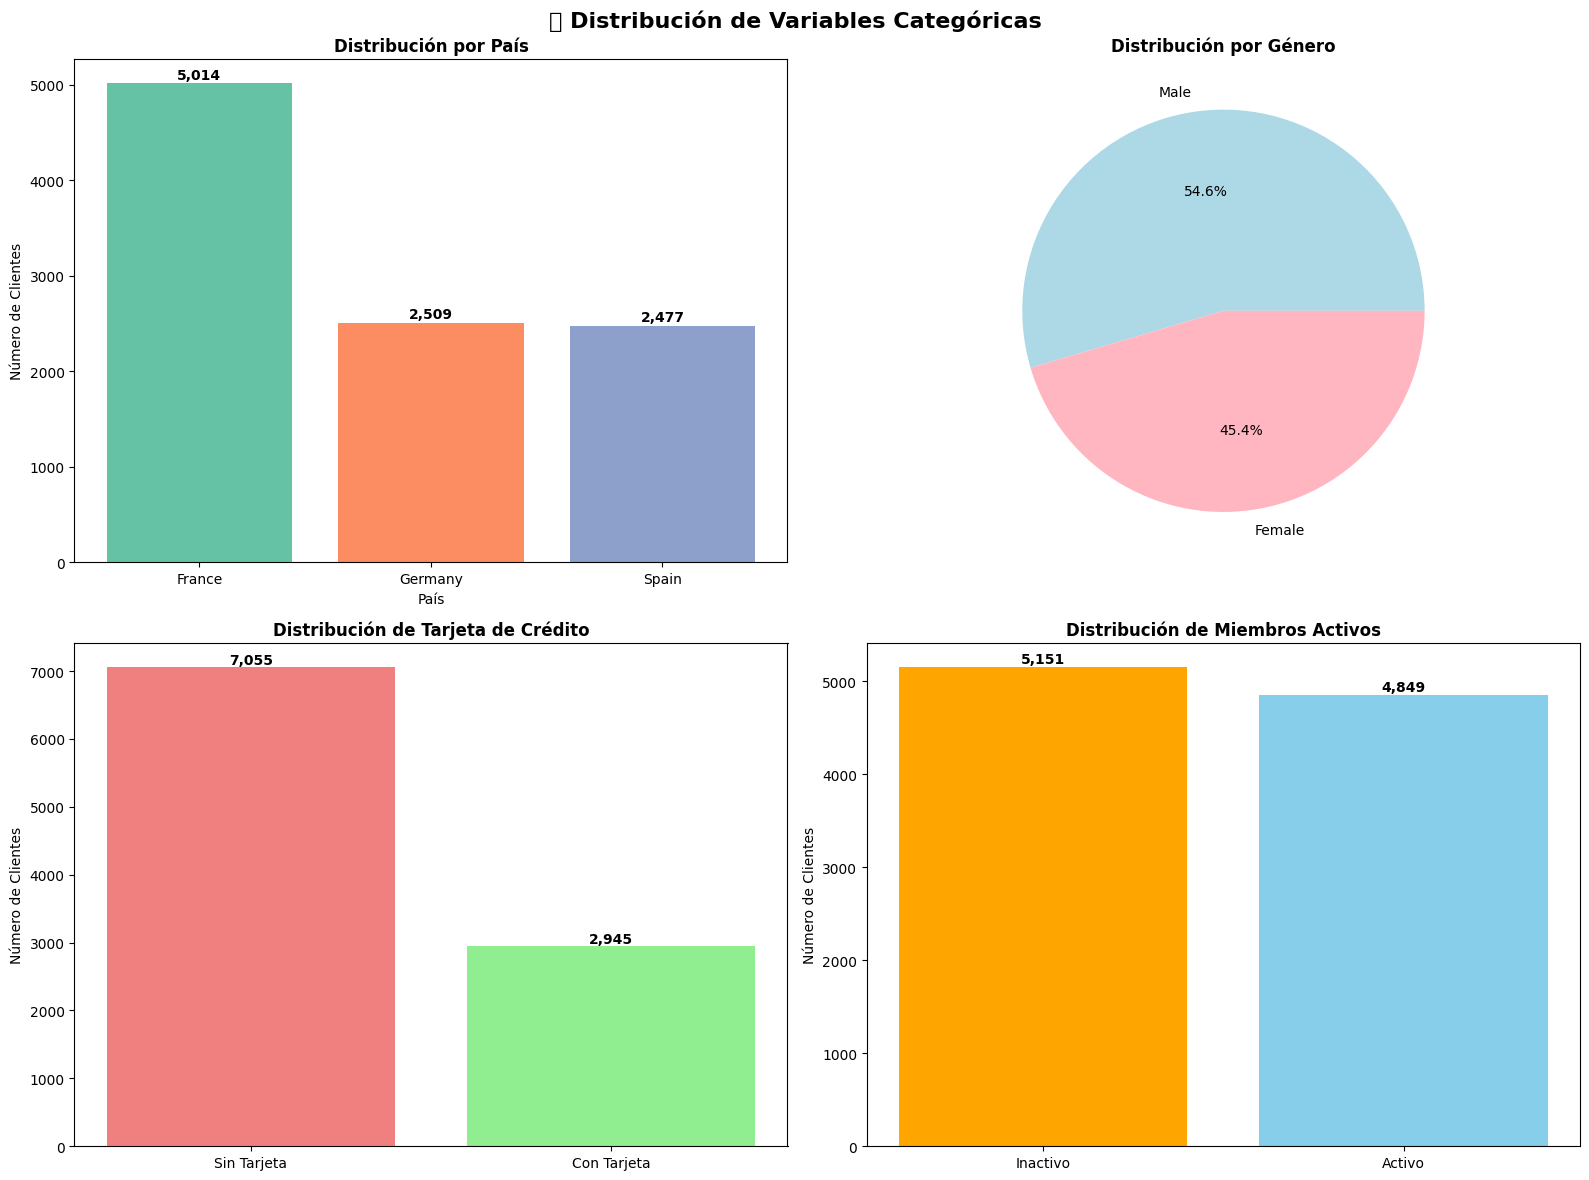

In [9]:

# Análisis de variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

# Geography
geography_counts = df['Geography'].value_counts()
axes[0, 0].bar(geography_counts.index, geography_counts.values, 
               color=sns.color_palette("Set2", len(geography_counts)))
axes[0, 0].set_title('Distribución por País', fontweight='bold')
axes[0, 0].set_xlabel('País')
axes[0, 0].set_ylabel('Número de Clientes')
for i, v in enumerate(geography_counts.values):
    axes[0, 0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Gender
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
               colors=['lightblue', 'lightpink'])
axes[0, 1].set_title('Distribución por Género', fontweight='bold')

# HasCrCard
hascard_counts = df['HasCrCard'].value_counts()
axes[1, 0].bar(['Sin Tarjeta', 'Con Tarjeta'], hascard_counts.values,
               color=['lightcoral', 'lightgreen'])
axes[1, 0].set_title('Distribución de Tarjeta de Crédito', fontweight='bold')
axes[1, 0].set_ylabel('Número de Clientes')
for i, v in enumerate(hascard_counts.values):
    axes[1, 0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# IsActiveMember
active_counts = df['IsActiveMember'].value_counts()
axes[1, 1].bar(['Inactivo', 'Activo'], active_counts.values,
               color=['orange', 'skyblue'])
axes[1, 1].set_title('Distribución de Miembros Activos', fontweight='bold')
axes[1, 1].set_ylabel('Número de Clientes')
for i, v in enumerate(active_counts.values):
    axes[1, 1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
# Resumen estadístico de variables categóricas
print("📊 RESUMEN DE VARIABLES CATEGÓRICAS")
print("=" * 50)

print("\n🌍 DISTRIBUCIÓN GEOGRÁFICA:")
geography_pct = df['Geography'].value_counts(normalize=True) * 100
for country, pct in geography_pct.items():
    print(f"   {country}: {pct:.1f}%")

print("\n👥 DISTRIBUCIÓN POR GÉNERO:")
gender_pct = df['Gender'].value_counts(normalize=True) * 100
for gender, pct in gender_pct.items():
    print(f"   {gender}: {pct:.1f}%")

print(f"\n💳 TARJETA DE CRÉDITO: {df['HasCrCard'].mean()*100:.1f}% tiene tarjeta")
print(f"🎯 MIEMBROS ACTIVOS: {df['IsActiveMember'].mean()*100:.1f}% son activos")

📊 RESUMEN DE VARIABLES CATEGÓRICAS

🌍 DISTRIBUCIÓN GEOGRÁFICA:
   France: 50.1%
   Germany: 25.1%
   Spain: 24.8%

👥 DISTRIBUCIÓN POR GÉNERO:
   Male: 54.6%
   Female: 45.4%

💳 TARJETA DE CRÉDITO: 70.5% tiene tarjeta
🎯 MIEMBROS ACTIVOS: 51.5% son activos


## 🔗 Análisis Bivariado: La Clave del Churn

### ¿Qué diferencia a los clientes que se van de los que se quedan?

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\1551711322.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


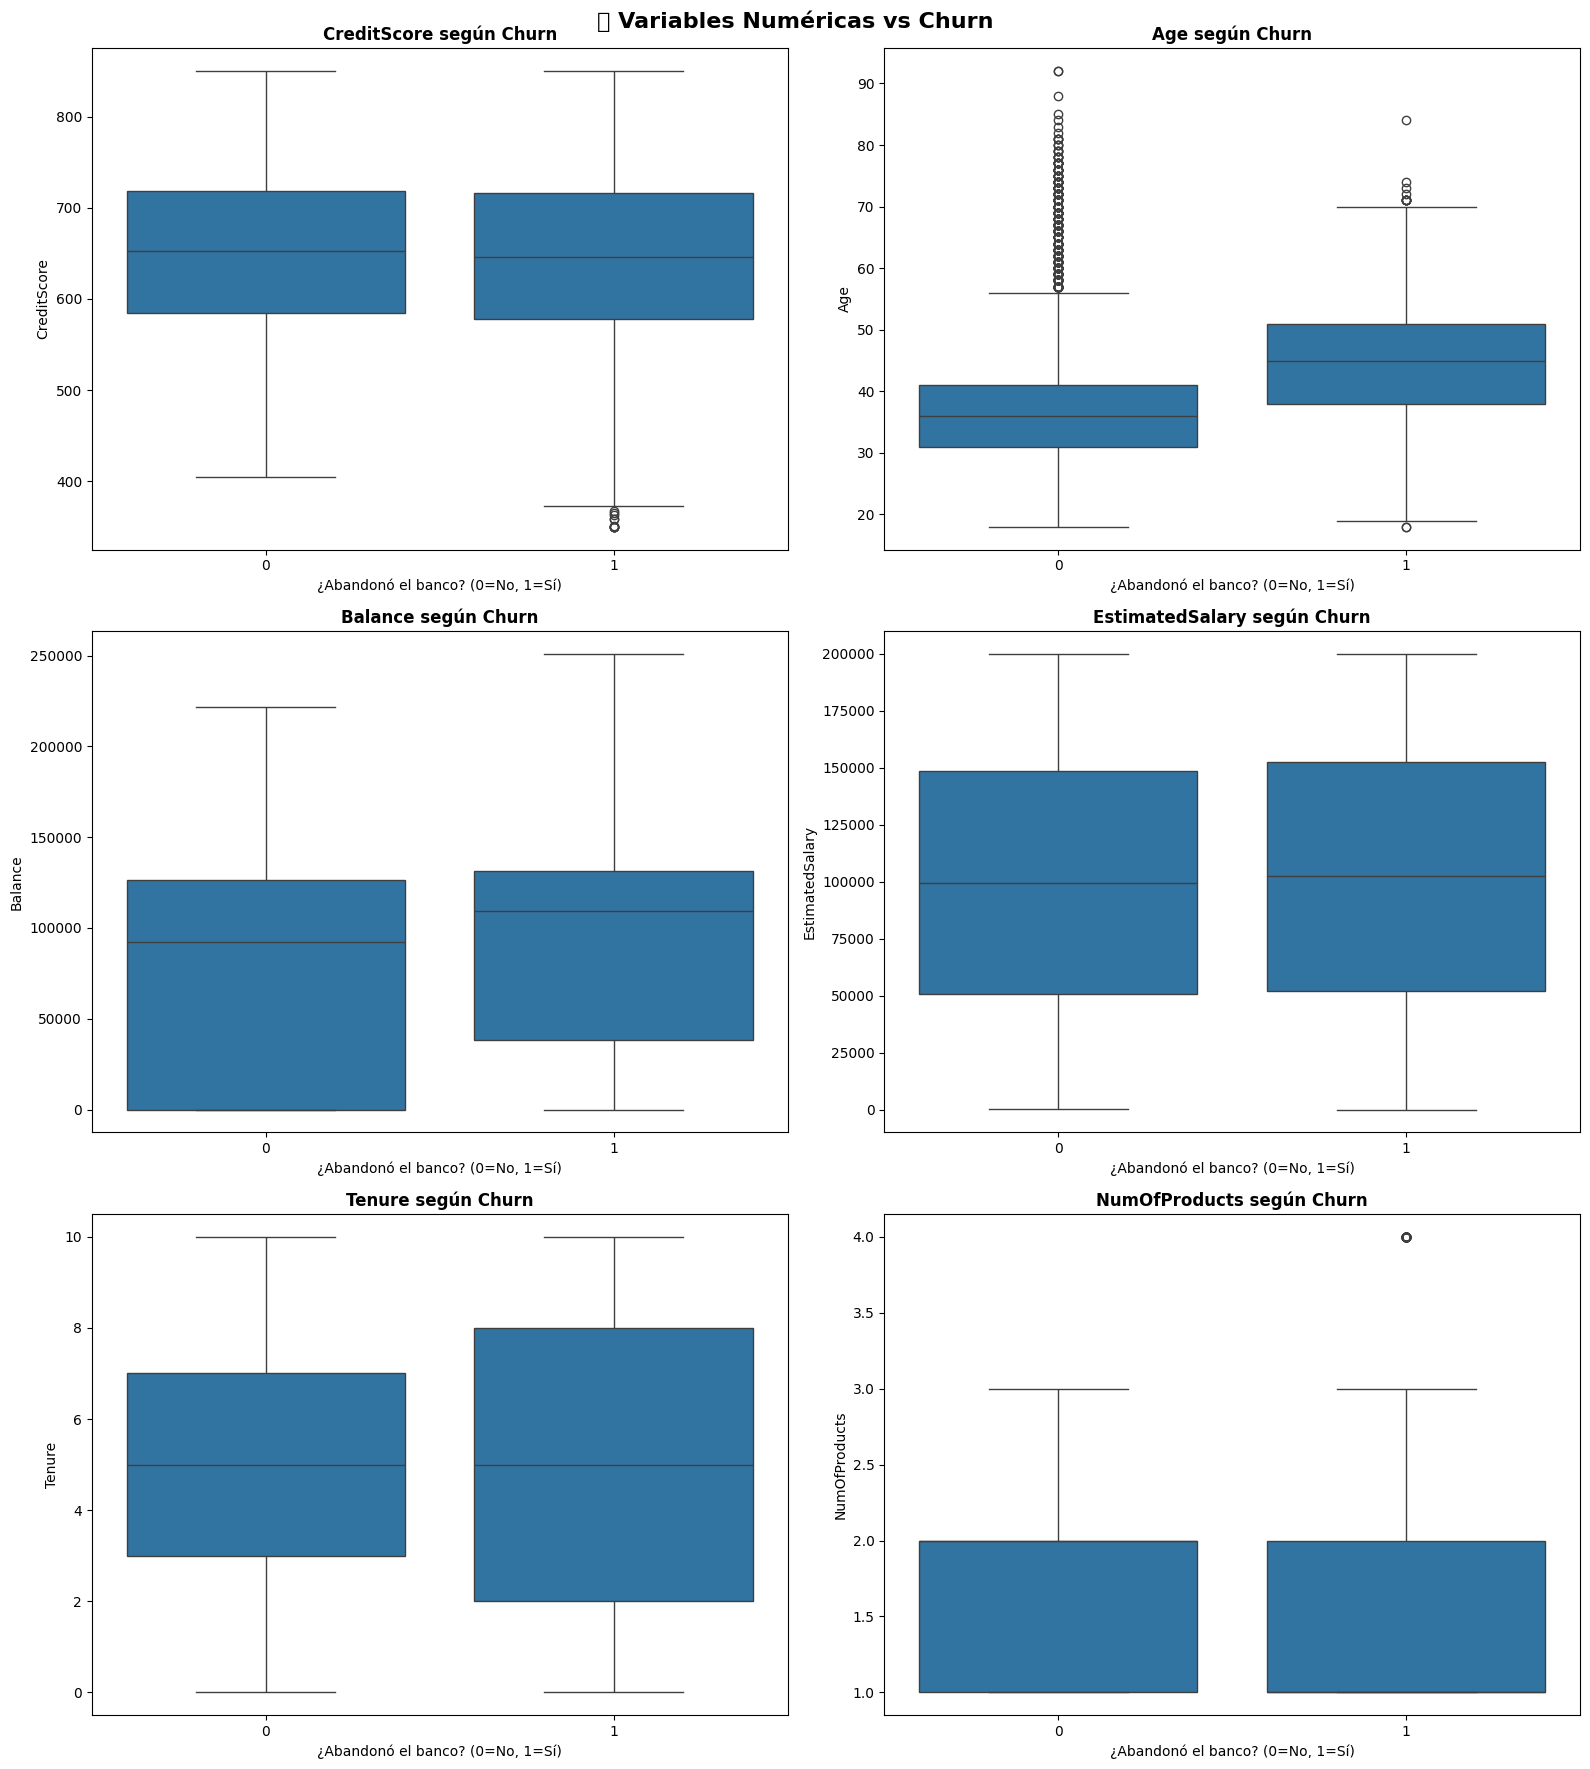

In [10]:
# Análisis bivariado: Variables numéricas vs Churn
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('📊 Variables Numéricas vs Churn', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_plot):
    row = i // 2
    col = i % 2
    
    # Box plot por churn
    sns.boxplot(data=df, x='Exited', y=var, ax=axes[row, col])
    axes[row, col].set_title(f'{var} según Churn', fontweight='bold')
    axes[row, col].set_xlabel('¿Abandonó el banco? (0=No, 1=Sí)')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

In [11]:
# Estadísticas por grupo de churn
print("📊 COMPARACIÓN DE PROMEDIOS: CLIENTES QUE SE QUEDAN VS CLIENTES QUE SE VAN")
print("=" * 80)

for var in variables_numericas:
    stayed_mean = df[df['Exited'] == 0][var].mean()
    left_mean = df[df['Exited'] == 1][var].mean()
    difference = left_mean - stayed_mean
    pct_diff = (difference / stayed_mean) * 100
    
    print(f"\n{var}:")
    print(f"   Se quedan: {stayed_mean:,.2f}")
    print(f"   Se van:    {left_mean:,.2f}")
    print(f"   Diferencia: {difference:+.2f} ({pct_diff:+.1f}%)")

📊 COMPARACIÓN DE PROMEDIOS: CLIENTES QUE SE QUEDAN VS CLIENTES QUE SE VAN

CreditScore:
   Se quedan: 651.85
   Se van:    645.35
   Diferencia: -6.50 (-1.0%)

Age:
   Se quedan: 37.41
   Se van:    44.84
   Diferencia: +7.43 (+19.9%)

Tenure:
   Se quedan: 5.03
   Se van:    4.93
   Diferencia: -0.10 (-2.0%)

Balance:
   Se quedan: 72,745.30
   Se van:    91,108.54
   Diferencia: +18363.24 (+25.2%)

NumOfProducts:
   Se quedan: 1.54
   Se van:    1.48
   Diferencia: -0.07 (-4.5%)

EstimatedSalary:
   Se quedan: 99,738.39
   Se van:    101,465.68
   Diferencia: +1727.29 (+1.7%)


C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\3233165230.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


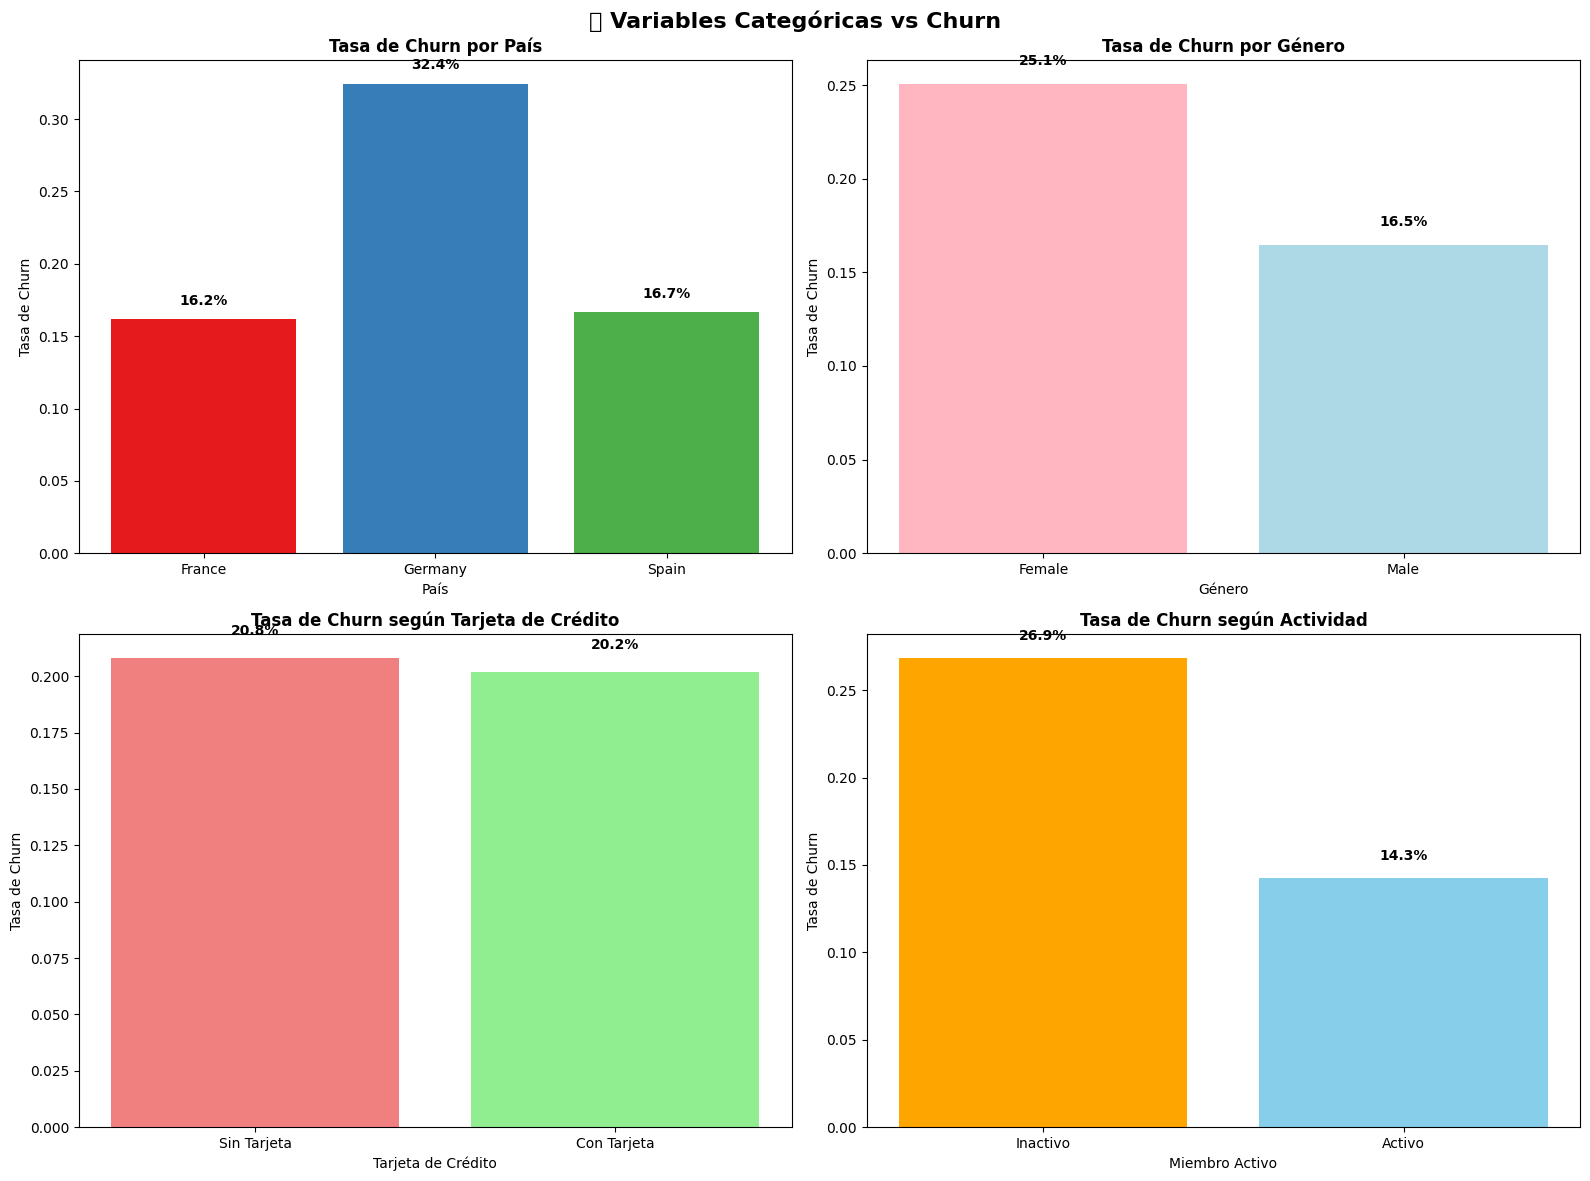

In [12]:
# Análisis de variables categóricas vs Churn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Variables Categóricas vs Churn', fontsize=16, fontweight='bold')

# Geography vs Churn
geography_churn = df.groupby('Geography')['Exited'].mean()
axes[0, 0].bar(geography_churn.index, geography_churn.values, 
               color=sns.color_palette("Set1", len(geography_churn)))
axes[0, 0].set_title('Tasa de Churn por País', fontweight='bold')
axes[0, 0].set_xlabel('País')
axes[0, 0].set_ylabel('Tasa de Churn')
for i, v in enumerate(geography_churn.values):
    axes[0, 0].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# Gender vs Churn
gender_churn = df.groupby('Gender')['Exited'].mean()
axes[0, 1].bar(gender_churn.index, gender_churn.values,
               color=['lightpink','lightblue' ])
axes[0, 1].set_title('Tasa de Churn por Género', fontweight='bold')
axes[0, 1].set_xlabel('Género')
axes[0, 1].set_ylabel('Tasa de Churn')
for i, v in enumerate(gender_churn.values):
    axes[0, 1].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# HasCrCard vs Churn
card_churn = df.groupby('HasCrCard')['Exited'].mean()
axes[1, 0].bar(['Sin Tarjeta', 'Con Tarjeta'], card_churn.values,
               color=['lightcoral', 'lightgreen'])
axes[1, 0].set_title('Tasa de Churn según Tarjeta de Crédito', fontweight='bold')
axes[1, 0].set_xlabel('Tarjeta de Crédito')
axes[1, 0].set_ylabel('Tasa de Churn')
for i, v in enumerate(card_churn.values):
    axes[1, 0].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# IsActiveMember vs Churn
active_churn = df.groupby('IsActiveMember')['Exited'].mean()
axes[1, 1].bar(['Inactivo', 'Activo'], active_churn.values,
               color=['orange', 'skyblue'])
axes[1, 1].set_title('Tasa de Churn según Actividad', fontweight='bold')
axes[1, 1].set_xlabel('Miembro Activo')
axes[1, 1].set_ylabel('Tasa de Churn')
for i, v in enumerate(active_churn.values):
    axes[1, 1].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# Tablas de contingencia para análisis más detallado
print("📊 ANÁLISIS DETALLADO POR CATEGORÍAS")
print("=" * 50)

print("\n🌍 CHURN POR PAÍS:")
geo_crosstab = pd.crosstab(df['Geography'], df['Exited'], normalize='index')
geo_crosstab.columns = ['Se Queda', 'Se Va']
display(geo_crosstab.round(3))

print("\n👥 CHURN POR GÉNERO:")
gender_crosstab = pd.crosstab(df['Gender'], df['Exited'], normalize='index')
gender_crosstab.columns = ['Se Queda', 'Se Va']
display(gender_crosstab.round(3))

print("\n💳 CHURN POR TARJETA DE CRÉDITO:")
card_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index')
card_crosstab.columns = ['Se Queda', 'Se Va']
card_crosstab.index = ['Sin Tarjeta', 'Con Tarjeta']
display(card_crosstab.round(3))

print("\n🎯 CHURN POR ACTIVIDAD:")
active_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')
active_crosstab.columns = ['Se Queda', 'Se Va']
active_crosstab.index = ['Inactivo', 'Activo']
display(active_crosstab.round(3))

📊 ANÁLISIS DETALLADO POR CATEGORÍAS

🌍 CHURN POR PAÍS:


,Se Queda,Se Va
Geography,,
France,0.838,0.162
Germany,0.676,0.324
Spain,0.833,0.167



👥 CHURN POR GÉNERO:


,Se Queda,Se Va
Gender,,
Female,0.749,0.251
Male,0.835,0.165



💳 CHURN POR TARJETA DE CRÉDITO:


,Se Queda,Se Va
Sin Tarjeta,0.792,0.208
Con Tarjeta,0.798,0.202



🎯 CHURN POR ACTIVIDAD:


,Se Queda,Se Va
Inactivo,0.731,0.269
Activo,0.857,0.143


## 🔥 Matriz de Correlación

### ¿Qué variables están más relacionadas con el churn?

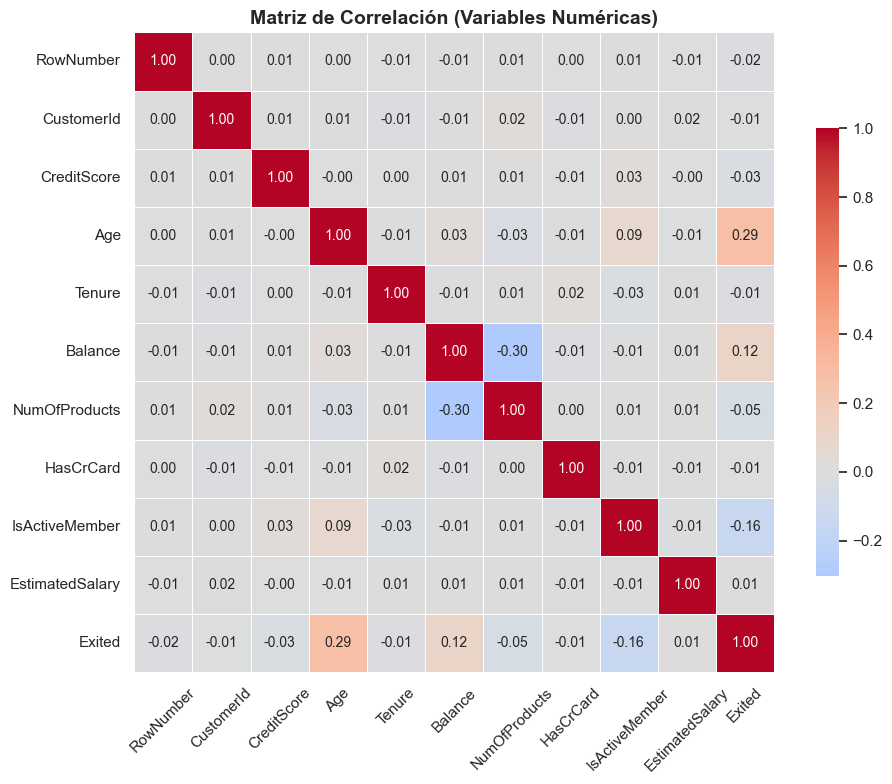

In [32]:
# Calcular matriz de correlación solo con variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Plot sin máscara (toda la matriz)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={"shrink": 0.7},
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.title('Matriz de Correlación (Variables Numéricas)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\1118381266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='coolwarm')


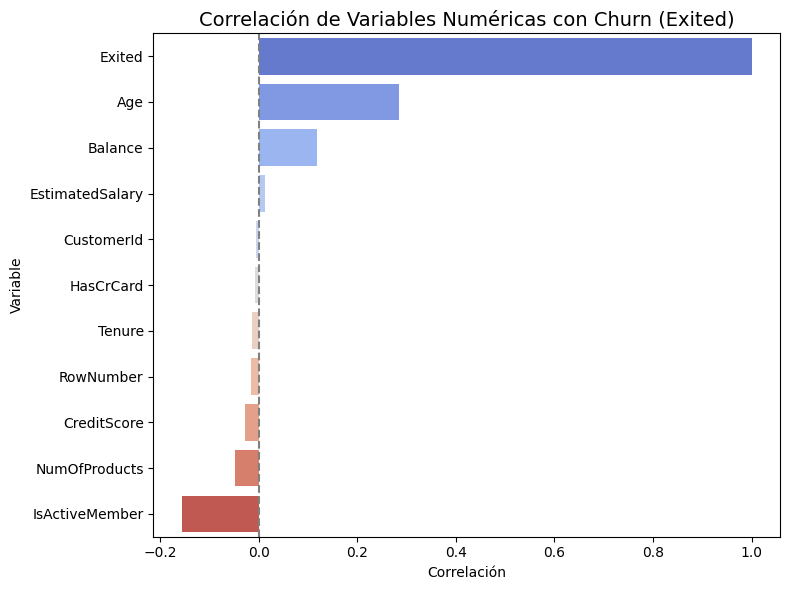

In [14]:
# Calcular correlación con la variable target 'Exited'
correlaciones = df.corr(numeric_only=True)['Exited'].sort_values(ascending=False)

# Graficar solo esa columna como barra
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='coolwarm')
plt.title('Correlación de Variables Numéricas con Churn (Exited)', fontsize=14)
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [33]:
# Correlaciones con Exited ordenadas
print("🎯 CORRELACIONES CON CHURN (ordenadas por fuerza)")
print("=" * 50)
churn_correlations = correlation_matrix['Exited'].drop('Exited').sort_values(key=abs, ascending=False)
for var, corr in churn_correlations.items():
    direction = "positiva" if corr > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.3 else "moderada" if abs(corr) > 0.1 else "débil"
    print(f"{var}: {corr:.3f} - Correlación {strength} {direction}")

🎯 CORRELACIONES CON CHURN (ordenadas por fuerza)
Age: 0.285 - Correlación moderada positiva
IsActiveMember: -0.156 - Correlación moderada negativa
Balance: 0.119 - Correlación moderada positiva
NumOfProducts: -0.048 - Correlación débil negativa
CreditScore: -0.027 - Correlación débil negativa
RowNumber: -0.017 - Correlación débil negativa
Tenure: -0.014 - Correlación débil negativa
EstimatedSalary: 0.012 - Correlación débil positiva
HasCrCard: -0.007 - Correlación débil negativa
CustomerId: -0.006 - Correlación débil negativa


## 📏 Entendiendo el Coeficiente de Correlación de Pearson



El coeficiente de correlación de Pearson (r) mide la **fuerza y dirección de la relación lineal** 
entre dos variables numéricas. Es una de las herramientas más poderosas del EDA.

### Características del Coeficiente de Pearson:
- **Rango:** Siempre entre -1 y +1
- **Interpretación:** 
  - r = +1: Correlación positiva perfecta
  - r = 0: No hay correlación lineal
  - r = -1: Correlación negativa perfecta
- **Simetría:** r(X,Y) = r(Y,X)

### 🎯 Interpretación del Coeficiente de Pearson

#### Fuerza de la Correlación:
- **|r| > 0.8**: Correlación muy fuerte
- **0.6 < |r| ≤ 0.8**: Correlación fuerte  
- **0.4 < |r| ≤ 0.6**: Correlación moderada
- **0.2 < |r| ≤ 0.4**: Correlación débil
- **|r| ≤ 0.2**: Correlación muy débil o nula

#### Dirección de la Correlación:
- **r > 0**: Correlación positiva (cuando X aumenta, Y tiende a aumentar)
- **r < 0**: Correlación negativa (cuando X aumenta, Y tiende a disminuir)

#### ⚠️ LIMITACIONES IMPORTANTES:
1. **Solo mide relaciones lineales** (puede existir relación no lineal con r ≈ 0)
2. **Sensible a outliers** (valores extremos pueden distorsionar r)
3. **Correlación ≠ Causación** (r alto no implica que X causa Y)

## 🚨 Detección de Outliers

### ¿Hay clientes con comportamientos atípicos?

In [ ]:
# Función mejorada para detectar outliers

# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detección de outliers en todas las variables numéricas
print("🚨 DETECCIÓN DE OUTLIERS (con valores extremos)")
print("=" * 50)

for var in ['CreditScore', 'Age', 'NumOfProducts']:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    pct_outliers = (len(outliers) / len(df)) * 100

    print(f"\n📊 {var.upper()}:")
    print(f"   Límite inferior (IQR): {lower:.2f}")
    print(f"   Límite superior (IQR): {upper:.2f}")
    print(f"   Outliers detectados: {len(outliers)} ({pct_outliers:.1f}%)")
    
    if not outliers.empty:
        min_outlier = outliers[var].min()
        max_outlier = outliers[var].max()
        print(f"   Valores extremos: {min_outlier:.2f} a {max_outlier:.2f}")
    
    #IQR es más sensible a valores extremos
    #Z-score es más conservador    #balance Zero-Inflated Model--

🚨 DETECCIÓN DE OUTLIERS (con valores extremos)

📊 CREDITSCORE:
   Límite inferior (IQR): 383.00
   Límite superior (IQR): 919.00
   Outliers detectados: 15 (0.1%)
   Valores extremos: 350.00 a 382.00

📊 AGE:
   Límite inferior (IQR): 14.00
   Límite superior (IQR): 62.00
   Outliers detectados: 359 (3.6%)
   Valores extremos: 63.00 a 92.00

📊 NUMOFPRODUCTS:
   Límite inferior (IQR): -0.50
   Límite superior (IQR): 3.50
   Outliers detectados: 60 (0.6%)
   Valores extremos: 4.00 a 4.00


In [29]:
def detect_outliers_iqr(df, column):
    """
    Detecta outliers usando el método IQR (Interquartile Range)
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """
    Detecta outliers usando el método Z-Score
    """
    clean_data = df[column].dropna()
    mean_val = clean_data.mean()
    std_val = clean_data.std()
    
    z_scores = np.abs((df[column] - mean_val) / std_val)
    outliers = df[z_scores > threshold]
    
    lower_bound = mean_val - threshold * std_val
    upper_bound = mean_val + threshold * std_val
    
    return outliers, lower_bound, upper_bound

In [30]:
print("🚨 DETECCIÓN DE OUTLIERS - ANÁLISIS COMPLETO")
print("=" * 60)

variables_completas = ['CreditScore', 'Age', 'NumOfProducts', 'Balance']

for var in variables_completas:
    print(f"\n{'='*50}")
    print(f"📊 {var.upper()}")
    print(f"{'='*50}")
    
    # IQR
    outliers_iqr, lower, upper = detect_outliers_iqr(df, var)
    pct_outliers_iqr = (len(outliers_iqr) / len(df)) * 100
    
    print(f"MÉTODO IQR:")
    print(f"   Límite inferior: {lower:.2f}")
    print(f"   Límite superior: {upper:.2f}")
    print(f"   Outliers detectados: {len(outliers_iqr)} ({pct_outliers_iqr:.1f}%)")
    
    if not outliers_iqr.empty:
        min_outlier = outliers_iqr[var].min()
        max_outlier = outliers_iqr[var].max()
        print(f"   Valores extremos: {min_outlier:.2f} a {max_outlier:.2f}")
    
    # Z-Score
    outliers_z, z_lower, z_upper = detect_outliers_zscore(df, var)
    pct_outliers_z = (len(outliers_z) / len(df)) * 100
    
    mean_val = df[var].mean()
    std_val = df[var].std()
    
    print(f"\nMÉTODO Z-SCORE:")
    print(f"   Media: {mean_val:.2f}")
    print(f"   Desviación estándar: {std_val:.2f}")
    print(f"   Límites (±3σ): [{z_lower:.2f}, {z_upper:.2f}]")
    print(f"   Outliers detectados: {len(outliers_z)} ({pct_outliers_z:.1f}%)")
    
    if not outliers_z.empty:
        min_outlier_z = outliers_z[var].min()
        max_outlier_z = outliers_z[var].max()
        print(f"   Valores extremos: {min_outlier_z:.2f} a {max_outlier_z:.2f}")
    
    # Análisis especial para Balance
    if var == 'Balance':
        zero_count = (df[var] == 0).sum()
        zero_pct = zero_count / len(df) * 100
        print(f"\n🔍 ANÁLISIS ESPECIAL - ZERO INFLATION:")
        print(f"   Valores = 0: {zero_count:,} ({zero_pct:.1f}%)")
        print(f"   Q1 = {df[var].quantile(0.25):.2f} (por eso límite inferior es negativo)")
        print(f"   Distribución bimodal: pico en 0 + distribución normal en valores positivos")
        if len(outliers_iqr) == 0:
            print(f"   ¡Por eso no hay outliers detectados!")

🚨 DETECCIÓN DE OUTLIERS - ANÁLISIS COMPLETO

📊 CREDITSCORE
MÉTODO IQR:
   Límite inferior: 383.00
   Límite superior: 919.00
   Outliers detectados: 15 (0.1%)
   Valores extremos: 350.00 a 382.00

MÉTODO Z-SCORE:
   Media: 650.53
   Desviación estándar: 96.65
   Límites (±3σ): [360.57, 940.49]
   Outliers detectados: 8 (0.1%)
   Valores extremos: 350.00 a 359.00

📊 AGE
MÉTODO IQR:
   Límite inferior: 14.00
   Límite superior: 62.00
   Outliers detectados: 359 (3.6%)
   Valores extremos: 63.00 a 92.00

MÉTODO Z-SCORE:
   Media: 38.92
   Desviación estándar: 10.49
   Límites (±3σ): [7.46, 70.39]
   Outliers detectados: 133 (1.3%)
   Valores extremos: 71.00 a 92.00

📊 NUMOFPRODUCTS
MÉTODO IQR:
   Límite inferior: -0.50
   Límite superior: 3.50
   Outliers detectados: 60 (0.6%)
   Valores extremos: 4.00 a 4.00

MÉTODO Z-SCORE:
   Media: 1.53
   Desviación estándar: 0.58
   Límites (±3σ): [-0.21, 3.28]
   Outliers detectados: 60 (0.6%)
   Valores extremos: 4.00 a 4.00

📊 BALANCE
MÉTODO IQR:

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\3715370528.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 2], palette=['lightblue', 'salmon'])
C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\3715370528.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 2], palette=['lightblue', 'salmon'])
C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\3715370528.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 2], palette=['

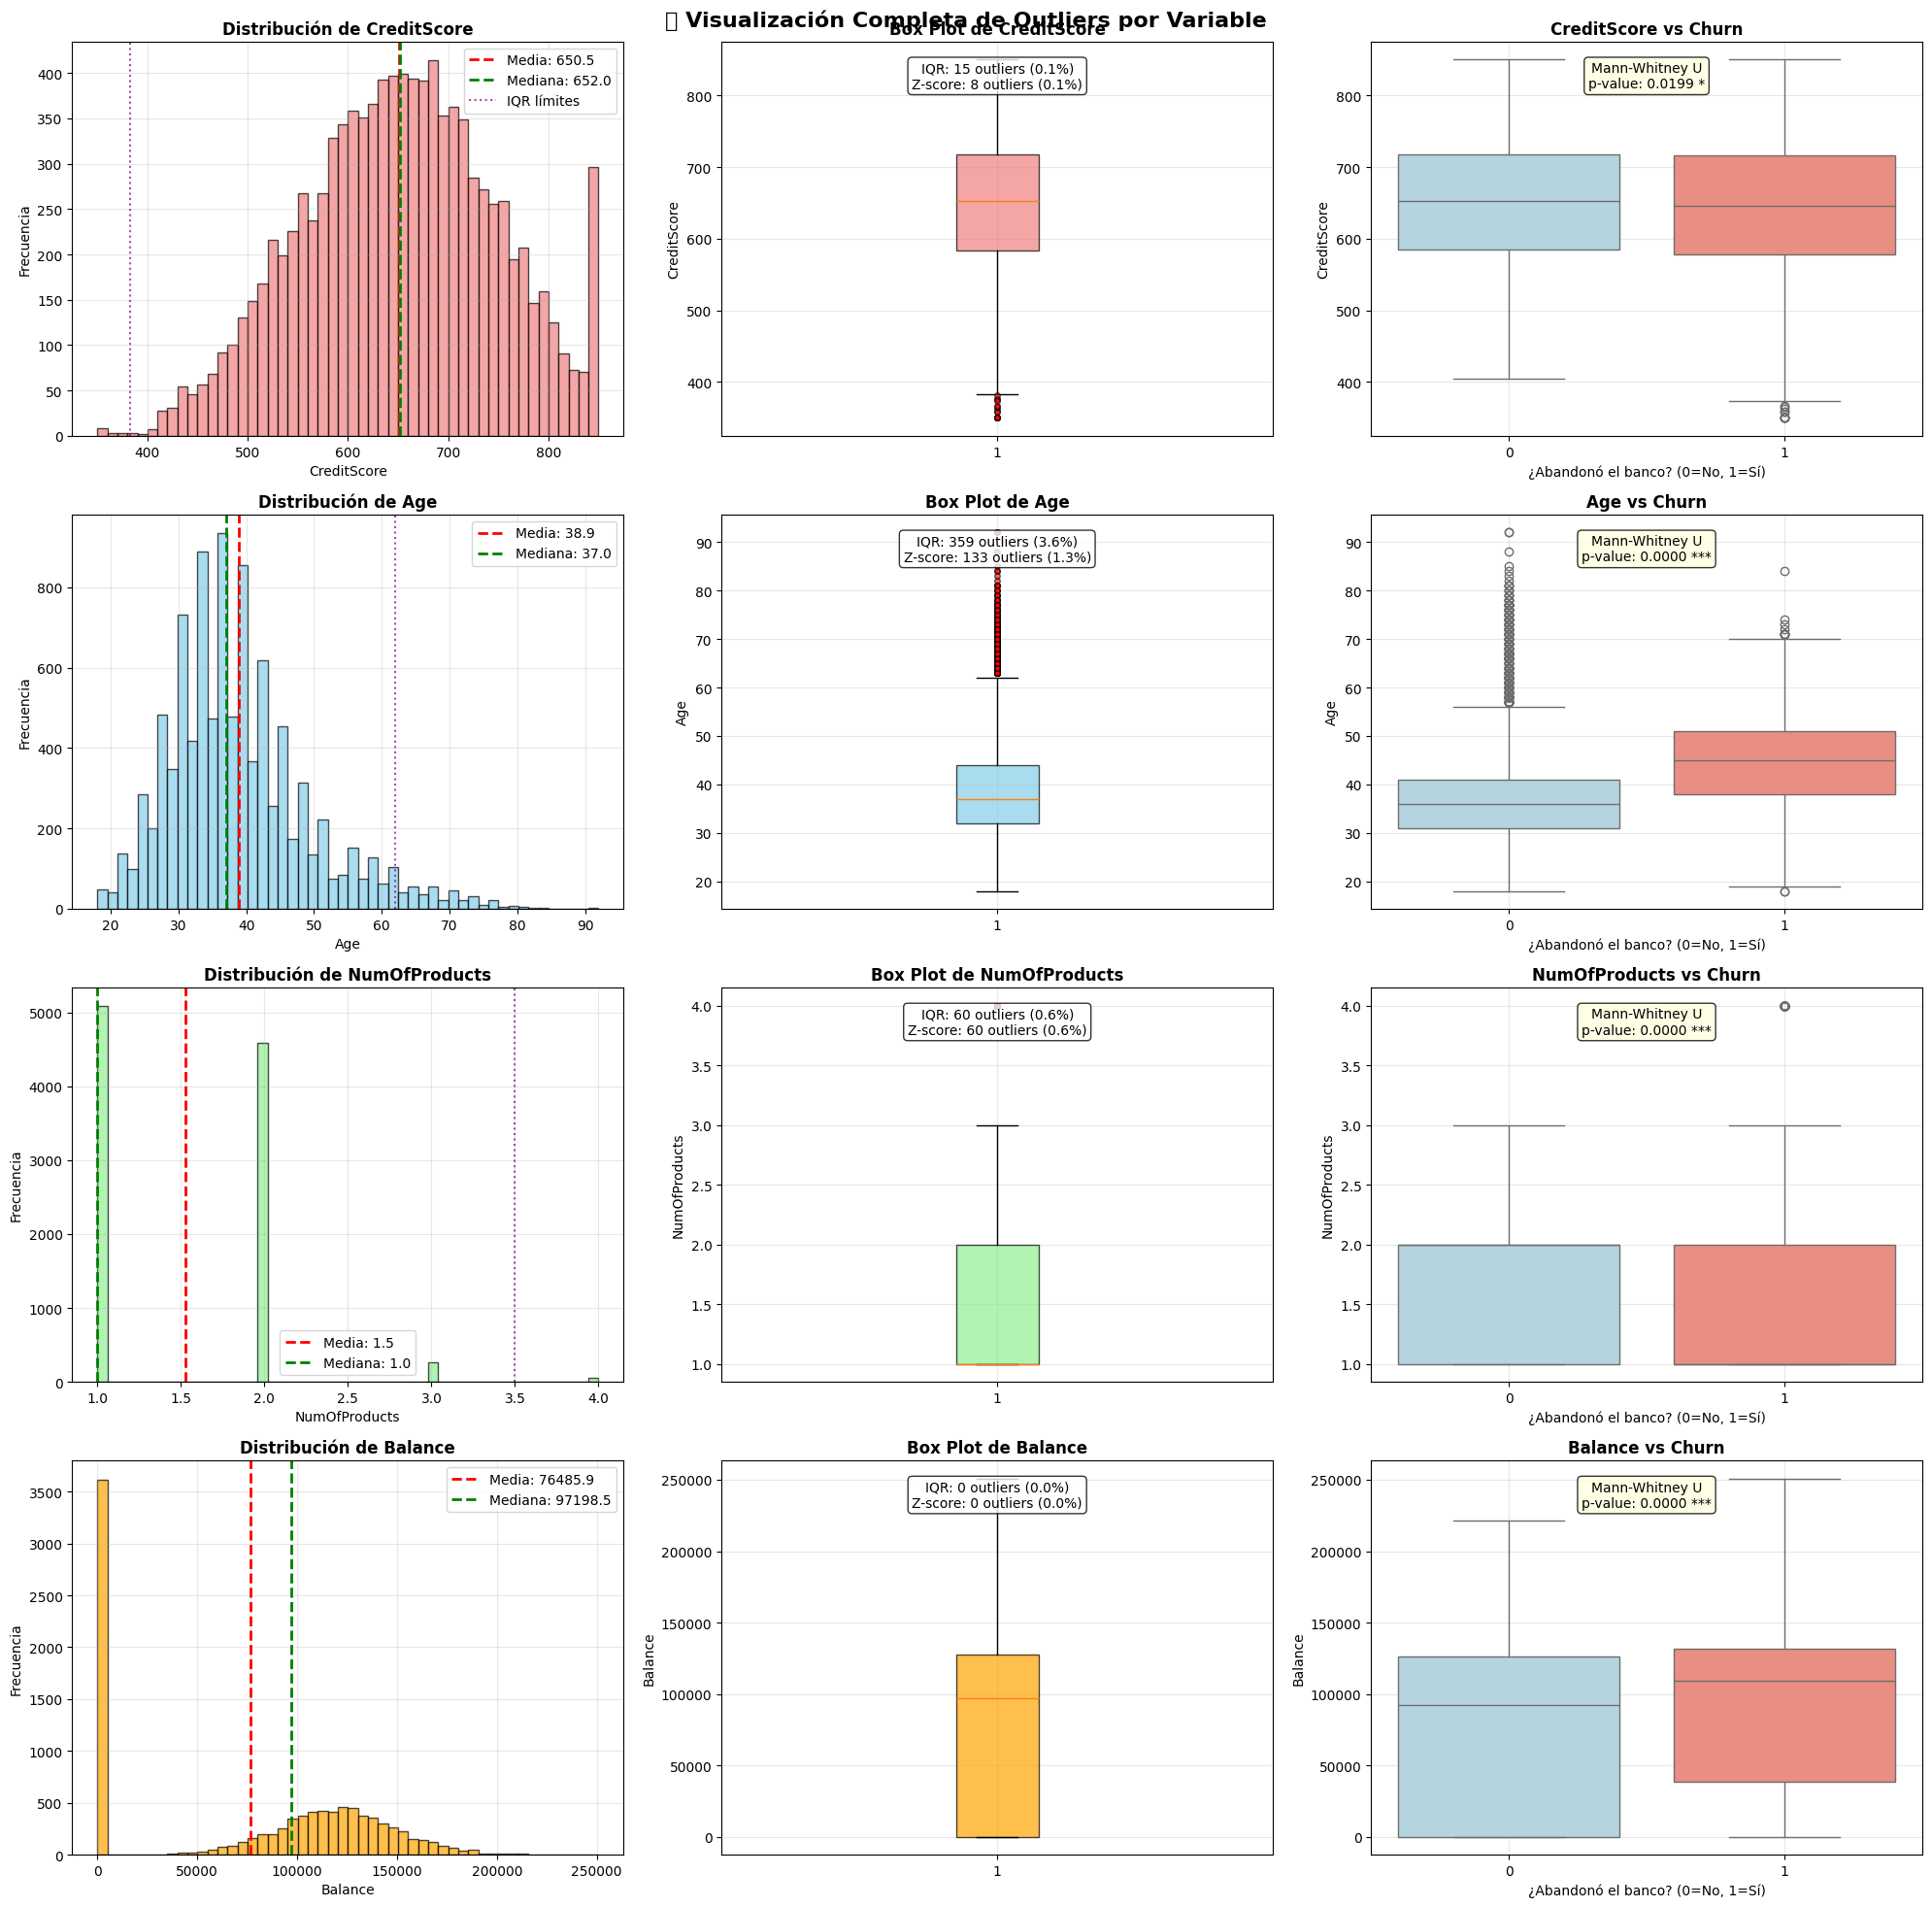

In [31]:
# Crear visualización para todas las variables
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('🚨 Visualización Completa de Outliers por Variable', fontsize=16, fontweight='bold')

colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']

for i, var in enumerate(variables_completas):
    
    # 1. HISTOGRAMA CON ESTADÍSTICAS
    axes[i, 0].hist(df[var], bins=50, alpha=0.7, color=colors[i], edgecolor='black')
    axes[i, 0].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Media: {df[var].mean():.1f}')
    axes[i, 0].axvline(df[var].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Mediana: {df[var].median():.1f}')
    
    # Marcar límites de outliers IQR
    outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(df, var)
    if lower_iqr > df[var].min():
        axes[i, 0].axvline(lower_iqr, color='purple', linestyle=':', alpha=0.7, 
                           label=f'IQR límites')
    if upper_iqr < df[var].max():
        axes[i, 0].axvline(upper_iqr, color='purple', linestyle=':', alpha=0.7)
    
    axes[i, 0].set_title(f'Distribución de {var}', fontweight='bold')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
    
    # 2. BOX PLOT CON INFORMACIÓN DE OUTLIERS
    bp = axes[i, 1].boxplot(df[var], patch_artist=True, 
                           boxprops=dict(facecolor=colors[i], alpha=0.7),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                         markersize=4, alpha=0.6))
    
    # Obtener estadísticas de outliers
    count_iqr = len(outliers_iqr)
    outliers_z, _, _ = detect_outliers_zscore(df, var)
    count_z = len(outliers_z)
    
    axes[i, 1].set_title(f'Box Plot de {var}', fontweight='bold')
    axes[i, 1].set_ylabel(var)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Información de outliers
    info_text = f'IQR: {count_iqr} outliers ({count_iqr/len(df)*100:.1f}%)\nZ-score: {count_z} outliers ({count_z/len(df)*100:.1f}%)'
    axes[i, 1].text(0.5, 0.95, info_text, 
                    transform=axes[i, 1].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # 3. VARIABLE VS CHURN
    sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 2], palette=['lightblue', 'salmon'])
    axes[i, 2].set_title(f'{var} vs Churn', fontweight='bold')
    axes[i, 2].set_xlabel('¿Abandonó el banco? (0=No, 1=Sí)')
    axes[i, 2].set_ylabel(var)
    axes[i, 2].grid(True, alpha=0.3)
    
    # Agregar estadísticas del test
    from scipy.stats import mannwhitneyu
    group_0 = df[df['Exited'] == 0][var]
    group_1 = df[df['Exited'] == 1][var]
    statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    axes[i, 2].text(0.5, 0.95, f'Mann-Whitney U\np-value: {p_value:.4f} {significance}', 
                    transform=axes[i, 2].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

## 🎯 Análisis Profundo: Segmentación de Clientes

### Creemos perfiles de clientes para entender mejor el churn

C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2932464978.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('AgeGroup')['Exited'].mean()
C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2932464978.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby('BalanceGroup')['Exited'].mean()
C:\Users\Flori\AppData\Local\Temp\ipykernel_15848\2932464978.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

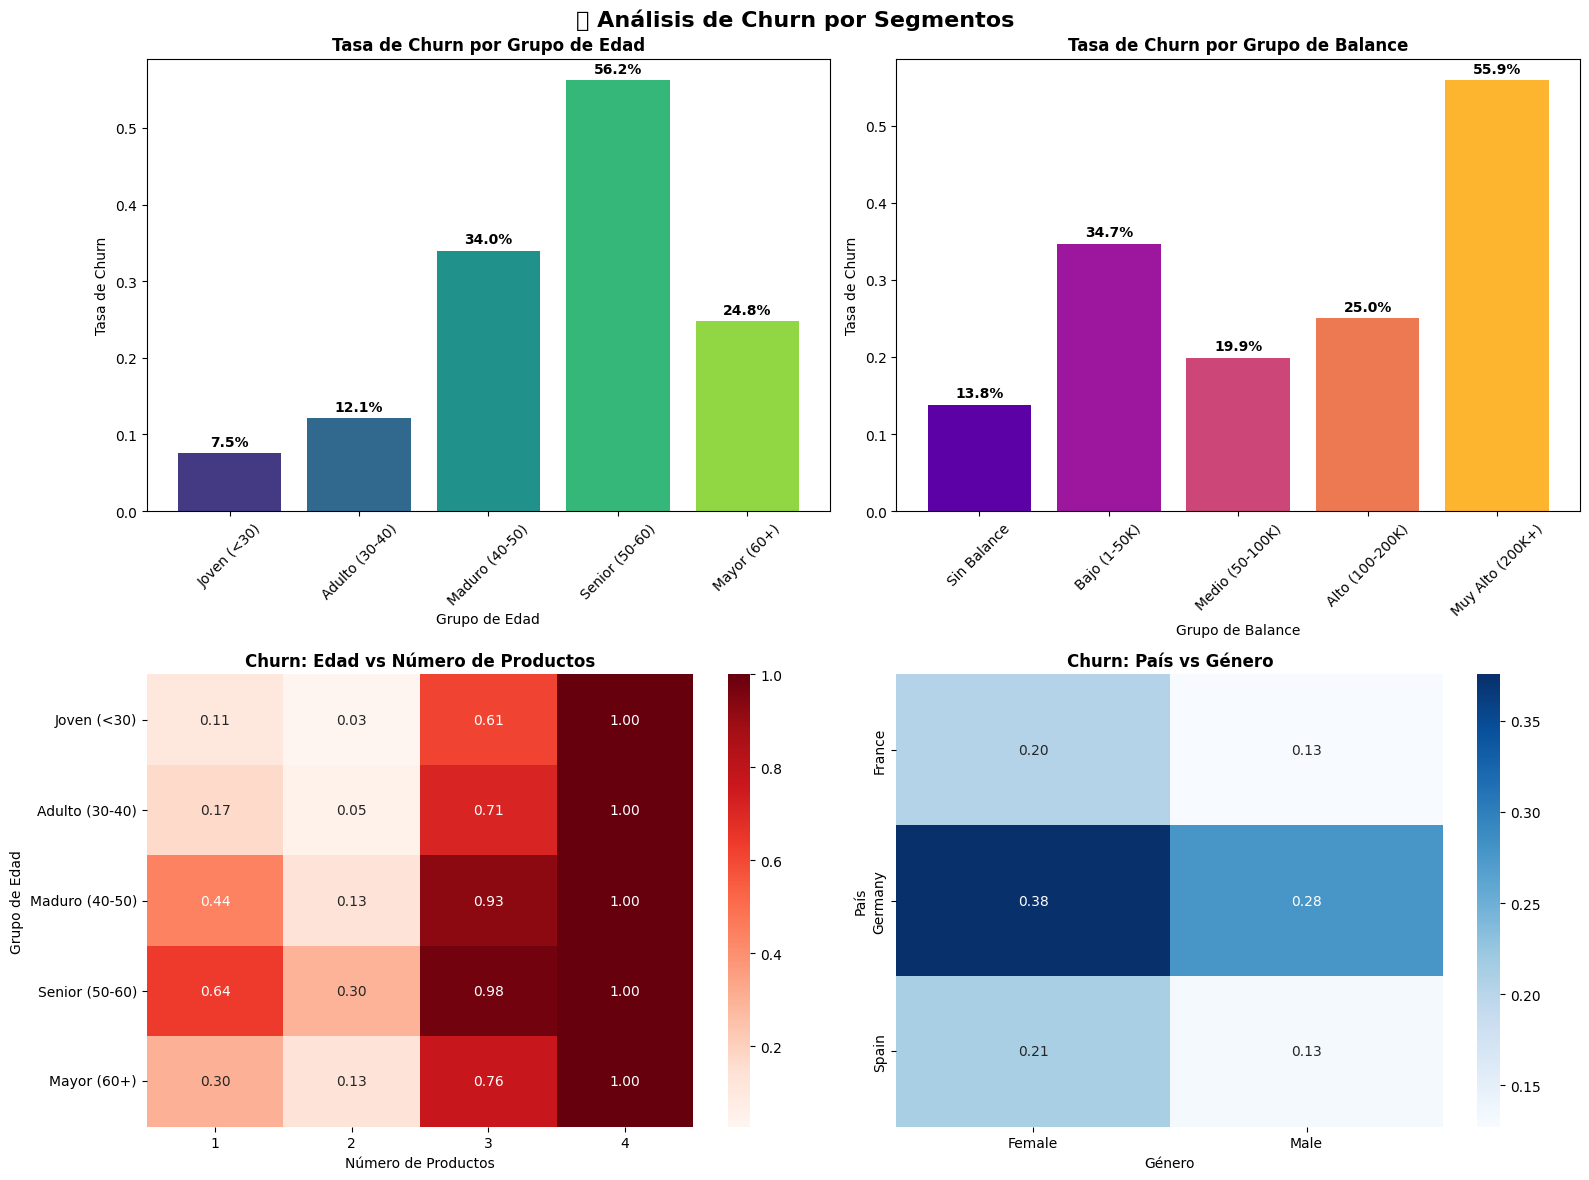

In [24]:
# Segmentación por edad
df['AgeGroup'] = pd.cut(df['Age'], 
                       bins=[0, 30, 40, 50, 60, 100], 
                       labels=['Joven (<30)', 'Adulto (30-40)', 'Maduro (40-50)', 
                              'Senior (50-60)', 'Mayor (60+)'])

# Segmentación por balance
df['BalanceGroup'] = pd.cut(df['Balance'], 
                           bins=[-1, 0, 50000, 100000, 200000, float('inf')], 
                           labels=['Sin Balance', 'Bajo (1-50K)', 'Medio (50-100K)', 
                                  'Alto (100-200K)', 'Muy Alto (200K+)'])

# Análisis de churn por segmentos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎯 Análisis de Churn por Segmentos', fontsize=16, fontweight='bold')

# Churn por grupo de edad
age_churn = df.groupby('AgeGroup')['Exited'].mean()
axes[0, 0].bar(range(len(age_churn)), age_churn.values, 
               color=sns.color_palette("viridis", len(age_churn)))
axes[0, 0].set_title('Tasa de Churn por Grupo de Edad', fontweight='bold')
axes[0, 0].set_xlabel('Grupo de Edad')
axes[0, 0].set_ylabel('Tasa de Churn')
axes[0, 0].set_xticks(range(len(age_churn)))
axes[0, 0].set_xticklabels(age_churn.index, rotation=45)
for i, v in enumerate(age_churn.values):
    axes[0, 0].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# Churn por grupo de balance
balance_churn = df.groupby('BalanceGroup')['Exited'].mean()
axes[0, 1].bar(range(len(balance_churn)), balance_churn.values,
               color=sns.color_palette("plasma", len(balance_churn)))
axes[0, 1].set_title('Tasa de Churn por Grupo de Balance', fontweight='bold')
axes[0, 1].set_xlabel('Grupo de Balance')
axes[0, 1].set_ylabel('Tasa de Churn')
axes[0, 1].set_xticks(range(len(balance_churn)))
axes[0, 1].set_xticklabels(balance_churn.index, rotation=45)
for i, v in enumerate(balance_churn.values):
    axes[0, 1].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# Heatmap: Edad vs Productos
age_products_churn = df.groupby(['AgeGroup', 'NumOfProducts'])['Exited'].mean().unstack()
sns.heatmap(age_products_churn, annot=True, fmt='.2f', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('Churn: Edad vs Número de Productos', fontweight='bold')
axes[1, 0].set_xlabel('Número de Productos')
axes[1, 0].set_ylabel('Grupo de Edad')

# Heatmap: País vs Género
country_gender_churn = df.groupby(['Geography', 'Gender'])['Exited'].mean().unstack()
sns.heatmap(country_gender_churn, annot=True, fmt='.2f', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Churn: País vs Género', fontweight='bold')
axes[1, 1].set_xlabel('Género')
axes[1, 1].set_ylabel('País')

plt.tight_layout()
plt.show()

In [25]:
# Análisis de clientes de alto riesgo
print("🚨 IDENTIFICACIÓN DE CLIENTES DE ALTO RIESGO")
print("=" * 50)

# Criterios de alto riesgo basados en hallazgos del EDA
high_risk_criteria = (
    (df['Age'] > 50) |                    # Edad mayor a 50
    (df['Geography'] == 'Germany') |       # Alemania tiene mayor churn
    (df['Gender'] == 'Female') |           # Mujeres tienen mayor churn  
    (df['IsActiveMember'] == 0) |          # No es miembro activo
    (df['NumOfProducts'] == 1) |           # Solo tiene 1 producto
    (df['Balance'] == 0)                   # Balance cero
)

high_risk_clients = df[high_risk_criteria]
high_risk_churn = high_risk_clients['Exited'].mean()
normal_risk_churn = df[~high_risk_criteria]['Exited'].mean()

print(f"Clientes de alto riesgo: {len(high_risk_clients):,} ({len(high_risk_clients)/len(df)*100:.1f}%)")
print(f"Tasa de churn alto riesgo: {high_risk_churn:.1%}")
print(f"Tasa de churn riesgo normal: {normal_risk_churn:.1%}")
print(f"Diferencia: {high_risk_churn - normal_risk_churn:+.1%}")

# %%
# Perfil del cliente que más probabilidad tiene de irse
print("\n👤 PERFIL DEL CLIENTE CON MAYOR RIESGO DE CHURN")
print("=" * 50)

churned_clients = df[df['Exited'] == 1]

print("📊 CARACTERÍSTICAS PROMEDIO DE CLIENTES QUE SE FUERON:")
print(f"   Edad promedio: {churned_clients['Age'].mean():.1f} años")
print(f"   Credit Score promedio: {churned_clients['CreditScore'].mean():.0f}")
print(f"   Balance promedio: ${churned_clients['Balance'].mean():,.0f}")
print(f"   Años como cliente: {churned_clients['Tenure'].mean():.1f}")
print(f"   Productos promedio: {churned_clients['NumOfProducts'].mean():.1f}")

print(f"\n🌍 DISTRIBUCIÓN GEOGRÁFICA DEL CHURN:")
churn_by_country = churned_clients['Geography'].value_counts(normalize=True)
for country, pct in churn_by_country.items():
    print(f"   {country}: {pct:.1%}")

print(f"\n👥 DISTRIBUCIÓN POR GÉNERO DEL CHURN:")
churn_by_gender = churned_clients['Gender'].value_counts(normalize=True)
for gender, pct in churn_by_gender.items():
    print(f"   {gender}: {pct:.1%}")


🚨 IDENTIFICACIÓN DE CLIENTES DE ALTO RIESGO
Clientes de alto riesgo: 9,754 (97.5%)
Tasa de churn alto riesgo: 20.6%
Tasa de churn riesgo normal: 11.4%
Diferencia: +9.2%

👤 PERFIL DEL CLIENTE CON MAYOR RIESGO DE CHURN
📊 CARACTERÍSTICAS PROMEDIO DE CLIENTES QUE SE FUERON:
   Edad promedio: 44.8 años
   Credit Score promedio: 645
   Balance promedio: $91,109
   Años como cliente: 4.9
   Productos promedio: 1.5

🌍 DISTRIBUCIÓN GEOGRÁFICA DEL CHURN:
   Germany: 40.0%
   France: 39.8%
   Spain: 20.3%

👥 DISTRIBUCIÓN POR GÉNERO DEL CHURN:
   Female: 55.9%
   Male: 44.1%


# Para ir viendo y empezar un EDA

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers